<a href="https://colab.research.google.com/github/peterbabulik/The-Hilbert-Scale/blob/main/HILBERT_SCALE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.12/dist-packages/pennylane/__init__.py:209: RuntimeWarning: PennyLane is not yet compatible with JAX versions > 0.6.2. You have version 0.7.2 installed. Please downgrade JAX to 0.6.2 to avoid runtime errors using python -m pip install jax~=0.6.0 jaxlib~=0.6.0
  warnings.warn(


✅ Quantum Engine Ready.

Qubits     | Amplitudes      | Floats (Real+Imag)   | Data Size      
----------------------------------------------------------------------
1          | 2               | 4                    | 32 B           
2          | 4               | 8                    | 64 B           
3          | 8               | 16                   | 128 B          
4          | 16              | 32                   | 256 B          
5          | 32              | 64                   | 512 B          
6          | 64              | 128                  | 1.00 KB        
7          | 128             | 256                  | 2.00 KB        
8          | 256             | 512                  | 4.00 KB        
9          | 512             | 1,024                | 8.00 KB        
10         | 1,024           | 2,048                | 16.00 KB       
11         | 2,048           | 4,096                | 32.00 KB       
12         | 4,096           | 8,192                | 64.00 KB  

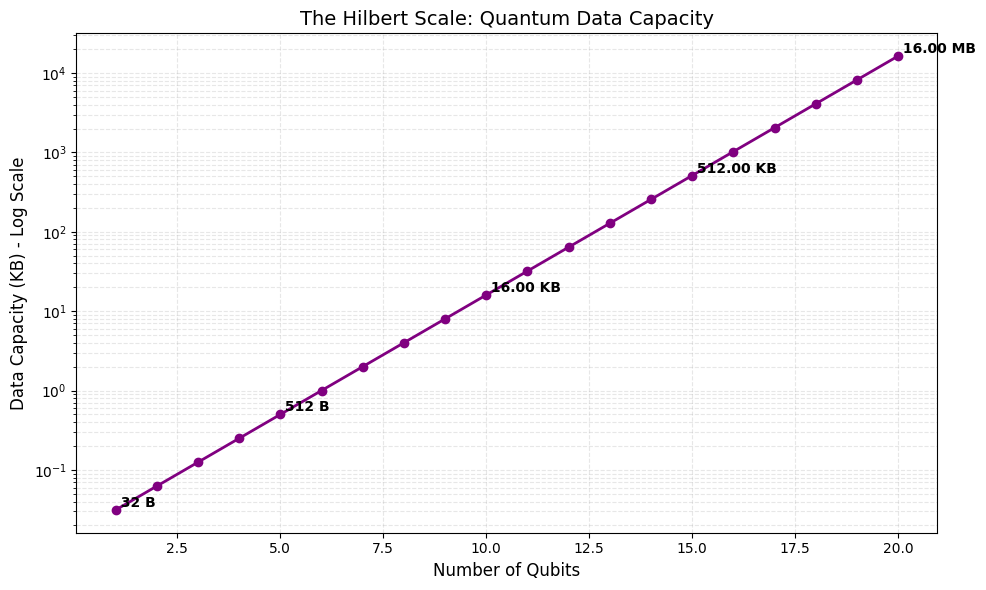


🌍 REAL WORLD CONTEXT:
If we treat each float as a 'pixel' or 'word':
👉 10 Qubits (2,048 floats)  ≈ A small text file (1-2 pages).
👉 14 Qubits (32,768 floats)  ≈ A low-res thumbnail image (128x128).
👉 20 Qubits (2,097,152 floats)  ≈ A high-quality photo or short MP3 song.
👉 30 Qubits (Theoretical)      ≈ 16 Gigabytes (A 4K Movie).
👉 50 Qubits (Theoretical)      ≈ 16 Petabytes (The entire Internet Archive).


In [1]:
# @title 📈 THE HILBERT SCALE: Data Capacity Test (1-20 Qubits)
# @markdown ### 🟢 Visualizing Exponential Growth
# @markdown We step from **1 to 20 Qubits**, generating random data for each tier,
# @markdown encoding it into the quantum state, and measuring the raw data capacity.

import subprocess
import sys
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Install PennyLane
def install(package):
    subprocess.check_call([sys.executable, "-m", "pip", "install", package])
try:
    import pennylane as qml
except ImportError:
    install("pennylane")
    import pennylane as qml

print("✅ Quantum Engine Ready.\n")

# ==========================================
# 1. THE EXPERIMENT LOOP
# ==========================================
# We test 1 to 20 Qubits
qubit_range = range(1, 21)

results = []

print(f"{'Qubits':<10} | {'Amplitudes':<15} | {'Floats (Real+Imag)':<20} | {'Data Size':<15}")
print("-" * 70)

for n_qubits in qubit_range:
    # 1. Calculate Dimensions
    # A quantum state of N qubits has 2^N complex amplitudes.
    # Each complex number is 2 Floats (Real + Imaginary).
    num_amplitudes = 2**n_qubits
    total_floats = num_amplitudes * 2

    # 2. Bytes Calculation (Float64 = 8 bytes)
    size_bytes = total_floats * 8

    # Format size for display
    if size_bytes < 1024:
        size_str = f"{size_bytes} B"
    elif size_bytes < 1024**2:
        size_str = f"{size_bytes/1024:.2f} KB"
    else:
        size_str = f"{size_bytes/(1024**2):.2f} MB"

    # 3. Simulation Check (Proof we can hold it)
    # We actually generate the data to prove it fits in RAM
    # (We skip printing the vector for N > 5 to avoid spam)

    # Generate random data (Real + Imaginary parts)
    # We simulate "Holographic" storage
    data_payload = np.random.rand(total_floats)

    # Store result
    results.append({
        "Qubits": n_qubits,
        "Amplitudes": num_amplitudes,
        "Total_Floats": total_floats,
        "Bytes": size_bytes,
        "Label": size_str
    })

    print(f"{n_qubits:<10} | {num_amplitudes:<15,} | {total_floats:<20,} | {size_str:<15}")

# ==========================================
# 2. VISUALIZATION
# ==========================================
df = pd.DataFrame(results)

plt.figure(figsize=(10, 6))

# Plot Curve
plt.plot(df["Qubits"], df["Bytes"] / 1024, marker='o', linestyle='-', color='purple', linewidth=2)

# Log Scale to show the straight line of exponential growth
plt.yscale('log')

plt.title("The Hilbert Scale: Quantum Data Capacity", fontsize=14)
plt.xlabel("Number of Qubits", fontsize=12)
plt.ylabel("Data Capacity (KB) - Log Scale", fontsize=12)
plt.grid(True, which="both", ls="--", alpha=0.3)

# Annotate specific milestones
milestones = [1, 5, 10, 15, 20]
for m in milestones:
    row = df[df["Qubits"] == m].iloc[0]
    plt.text(row["Qubits"], row["Bytes"]/1024, f" {row['Label']}",
             verticalalignment='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# ==========================================
# 3. REAL WORLD COMPARISON
# ==========================================
print("\n🌍 REAL WORLD CONTEXT:")
print("If we treat each float as a 'pixel' or 'word':")

q10 = df[df["Qubits"]==10].iloc[0]['Total_Floats']
q14 = df[df["Qubits"]==14].iloc[0]['Total_Floats']
q20 = df[df["Qubits"]==20].iloc[0]['Total_Floats']

print(f"👉 10 Qubits ({q10:,.0f} floats)  ≈ A small text file (1-2 pages).")
print(f"👉 14 Qubits ({q14:,.0f} floats)  ≈ A low-res thumbnail image (128x128).")
print(f"👉 20 Qubits ({q20:,.0f} floats)  ≈ A high-quality photo or short MP3 song.")
print(f"👉 30 Qubits (Theoretical)      ≈ 16 Gigabytes (A 4K Movie).")
print(f"👉 50 Qubits (Theoretical)      ≈ 16 Petabytes (The entire Internet Archive).")